# Principal Component Analysis

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

Let's use the online news popularity dataset again.

In [2]:
df = pd.read_csv('./data/OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [9]:
df.columns = list(map(str.strip, df.columns))

In [10]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


How many predictors do we have here?

Let's use PCA to see if we can reduce it.

In [23]:
pca = PCA(random_state=123)

In [24]:
predictors = df.columns[1:-1]

In [25]:
predictors

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [52]:
X = df[predictors]

In [53]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=123,
    svd_solver='auto', tol=0.0, whiten=False)

### Explain the principal components

In [54]:
pc_df = pd.DataFrame(pca.components_, columns=predictors, index=[f'pc_{i}' for i in range(pca.n_components_)])

Let's see the first 5 components

In [55]:
pc_df.head().T

,pc_0,pc_1
timedelta,6.074664e-04,-3.536530e-05
n_tokens_title,-1.185931e-06,5.354602e-07
n_tokens_content,-5.172170e-05,-6.868572e-04
n_unique_tokens,1.758714e-08,7.589266e-08
n_non_stop_words,8.962409e-09,-1.747245e-07
n_non_stop_unique_tokens,3.096823e-08,-1.501902e-08
num_hrefs,-1.870090e-06,-6.911157e-06
num_self_hrefs,2.293061e-07,-2.684561e-06
num_imgs,-1.567143e-06,-3.070180e-06
num_videos,-5.212760e-07,6.123771e-06


## How many components should we choose?

The rule of thumb is that we keep at least 90% of the original dataset's variance.

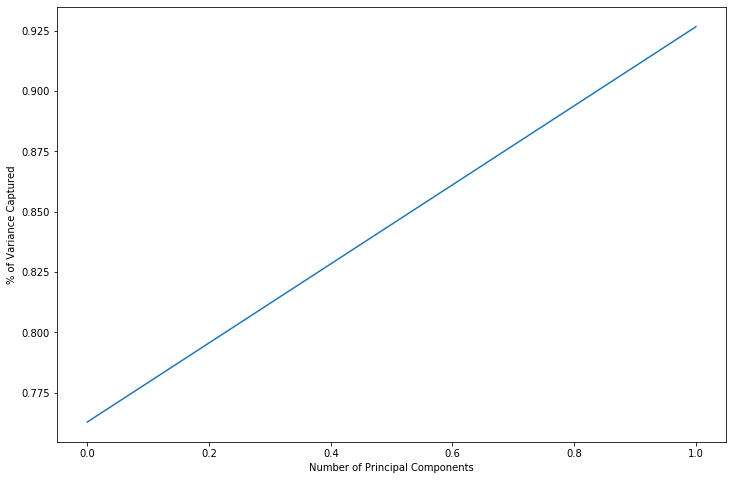

In [56]:
_ = plt.subplots(figsize=(12, 8))
_ = plt.plot(np.arange(pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
_ = plt.xlabel('Number of Principal Components')
_ = plt.ylabel('% of Variance Captured')

Visually, we can see that we need 2-3 principal components to keep 90% of the original dataset's variance. How do we see it more accurately?

In [57]:
(np.cumsum(pca.explained_variance_ratio_) < 0.9).sum() + 1

2

Now we know we can transform the original dataset into a new space with only two dimensions. Let's refit the PCA again.

In [58]:
pca = PCA(n_components=2, random_state=123)

In [59]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=123,
    svd_solver='auto', tol=0.0, whiten=False)

**Explain New Dimensions**

This is the hard part. Usually we need SME (subject matter experts) to help explain the new components.

In [44]:
pc_df = pd.DataFrame(pca.components_, columns=predictors, index=[f'pc_{i}' for i in range(pca.n_components_)])

In [51]:
pc_df.T.sort_values('pc_0')

,pc_0,pc_1
kw_max_max,-9.056785e-01,-4.143245e-01
kw_avg_max,-4.216681e-01,8.591561e-01
kw_min_max,-4.179909e-02,2.980841e-01
self_reference_max_shares,-1.120053e-02,3.050568e-02
self_reference_avg_sharess,-6.592492e-03,1.678974e-02
self_reference_min_shares,-3.562200e-03,8.131249e-03
kw_max_avg,-2.972816e-03,4.653632e-03
kw_avg_avg,-1.694916e-03,3.745357e-03
kw_min_avg,-1.164965e-03,3.890834e-03
n_tokens_content,-5.172170e-05,-6.868572e-04


Let's now transform the original dataset into the new dimensions.

In [62]:
new_X = pd.DataFrame(pca.transform(X), columns=['PC_1', 'PC_1'])

In [66]:
# Let's add the URL and target variables back into the dataframe
new_X.insert(0, 'url', df.url)
new_X.insert(3, 'shares', df.shares)

In [67]:
new_X.head()

,url,PC_1,PC_1,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,791448.520136,84416.867661,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,791459.110470,84389.351324,711
2,http://mashable.com/2013/01/07/apple-40-billio...,791439.508650,84440.263211,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,791459.096185,84389.161689,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,791257.144238,84934.219442,505


This is the new dataset that we will work with. How many dimensions did we reduce?